<a href="https://colab.research.google.com/github/lkidane/Deep-learning-/blob/NLP/Copy_of_NLP_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gensim: a package to train and use word vectors

Gensim is a Python package that allows to train and use word vectors.
A lot of functions for word vectors analysis are implemented by Gensim.

In [0]:
import gensim
import time

In [2]:
import gensim.downloader as api
import warnings

warnings.filterwarnings("ignore", "Conversion of the second argument of issubdtype from", FutureWarning)
warnings.filterwarnings("ignore", "This function is deprecated, use smart_open.open instead. See the migration notes for ", UserWarning)
warnings.filterwarnings("ignore", "arrays to stack must be passed as a", FutureWarning)

# This will load word vectors for a large vocabulary 
# It should take < 5 minutes
wv = api.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


In the following cell, we download a list of analogies.

In [3]:
!wget https://raw.githubusercontent.com/nicholas-leonard/word2vec/master/questions-words.txt

--2020-01-25 11:09:47--  https://raw.githubusercontent.com/nicholas-leonard/word2vec/master/questions-words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.05s   

2020-01-25 11:09:47 (11.4 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In the next cell, we open the downloaded file and take a look to see what it contains.
We print the first 5 lines.

In [4]:
f = open('questions-words.txt', 'r')
for line in f.readlines()[:5]:
    print(line)

: capital-common-countries

Athens Greece Baghdad Iraq

Athens Greece Bangkok Thailand

Athens Greece Beijing China

Athens Greece Berlin Germany



Note that :
- Athens is to Greece what Baghdad is to Iraq
- Athens is to Greece what Bangkok is to Thailand
- Athens is to Greece what Beijing is to China
etc...

Remember the word analogy task : 
A is to B what C is to D

As we saw before, using word vectors, we can try to guess D using the word vectors of A, B and C !

We use the formula :
$$B-A + C \approx D$$

For each analogy (A,B,C,D) described in the file "questions-words.txt", we can try to :
- compute $\tilde{C} = B-A + C$ with the word vectors
- compute the nearest neighbors of $\tilde{C}$ in the word vectors.
- If the nearest neighbor is $C$, we've answered correctly to the analogy, otherwise we didn't.

Averaging correct / incorrect answers on each analogies gives us a metric. This metric can be used as an indicator of quality of the word embeddings.

In the next cell, we will ask Gensim to compute this metric for us.

In [5]:
# This should take approximately 5 minutes

start = time.time()
results = wv.evaluate_word_analogies(analogies='questions-words.txt')
print(f"Accuracy on the world analogy task {results[0]}")
print(f"Evaluating this took {time.time() - start}")

Accuracy on the world analogy task 0.463717540798522
Evaluating this took 186.21752309799194


**TODO FIX THIS**


Each word is associated with an index value (between 0 and $n_{words} - 1$).
If two words have similar spelling, this information will be lost as the words are replaced with their indices.
However, we can see that the model still discovers similar meanings automatically: if I take the two words "car" and "cars", the model has put these vectors close together. 

Can you guess why ?

**TODO CAR VS HOUSE**

Answer: These words appear in similar context. In the corpus there are probably sentences like "I drive my car on the highway" and "They drive their cars on the highway", which means that "car" and "cars" both appear in the context ["drive", "highway"].

We can use gensim to check the closest word to a word.


In [6]:
print(wv.most_similar(positive=['car'], topn=5))

[('truck', 0.9208585619926453), ('cars', 0.8870190382003784), ('vehicle', 0.8833684325218201), ('driver', 0.8464018702507019), ('driving', 0.8384189009666443)]


Question: What does this do ?

**Out of a list of words, this prints the one that is least similar to the others. (We gave example code to do this in the second quizz)**

In [7]:
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))


car


## Train your own word vectors

Download and extract the IMDB Sentiment classification corpus


In [8]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar xzf aclImdb_v1.tar.gz

--2020-01-25 11:13:01--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  42.0MB/s    in 1.9s    

2020-01-25 11:13:03 (42.0 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In the following cell, we define a class called GensimCorpus. Can you guess what it does ? The code look complicated ...

In [0]:
from gensim import utils
import os
from os.path import join

class GensimCorpus(object):
    """An interator that yields sentences (lists of str)."""

    def __init__(self, path="aclImdb/train/unsup"):
        self.path = path
        self.filenames = [fname for fname in os.listdir(path) if fname.endswith(".txt")]
        

    def __iter__(self):
        for fname in self.filenames:
            # assume there's one document per line, tokens separated by whitespace
            with open(join(self.path, fname), "r") as f:
                lines = f.readlines()
                assert len(lines) == 1
                line = lines[0].strip()
                yield utils.simple_preprocess(line)


In  order to understand what it does, we will try to use it. ```__iter__ ``` is defined for generators, let's try to see what this generator outputs !

In [10]:
sentences = GensimCorpus()  # instanciate this weird object

for i, mystery_object in enumerate(sentences):
    print(mystery_object)
    if i == 5:
        break  # we only want to display 5 elements

['friend', 'of', 'mine', 'made', 'me', 'tape', 'of', 'various', 'stuff', 'this', 'was', 'on', 'it', 'had', 'never', 'even', 'heard', 'of', 'this', 'film', 'before', 'now', 'know', 'why', 'wonder', 'why', 'glitter', 'has', 'lower', 'rating', 'then', 'this', 'drivel', 'but', 'am', 'afraid', 'to', 'watch', 'that', 'film', 'to', 'find', 'out', 'for', 'myself', 'lest', 'wake', 'up', 'in', 'the', 'middle', 'of', 'the', 'night', 'from', 'mariah', 'carey', 'nightmare', 'br', 'br', 'so', 'watched', 'it', 'but', 'watched', 'most', 'of', 'it', 'in', 'fast', 'forward', 'you', 'get', 'the', 'picture', 'that', 'most', 'of', 'the', 'cast', 'are', 'mean', 'people', 'who', 'are', 'going', 'to', 'get', 'it', 'in', 'bad', 'ways', 'as', 'soon', 'as', 'they', 'are', 'introduced', 'br', 'br', 'this', 'is', 'real', 'stinker', 'one', 'of', 'those', 'heavy', 'metal', 'horror', 'films', 'that', 'never', 'should', 'have', 'been', 'conceived', 'the', 'problem', 'is', 'not', 'that', 'the', 'movie', 'is', 'stupid',

Gensim can learn word embeddings ( == word vectors) from a text corpus. Let's learn word embeddings on our GensimCorpus.

In [11]:
import gensim.models

# This should take approximately 3 minutes
start = time.time()
model = gensim.models.Word2Vec(sentences=sentences, size=50)
print("Took %.2f" % (time.time() - start))

Took 147.33


In [12]:
model["was"].shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(50,)

The model we learned, ```model``` contains word vectors ```model.wv```. We can use ```evaluate_word_analogies``` as before to evaluate the quality of our newly learned word vectors.

In [13]:
# This should take approximately 5 minutes

start = time.time()
results2 = model.wv.evaluate_word_analogies(analogies='questions-words.txt')

print(f"Accuracy on the world analogy task {results2[0]}")
print(f"Evaluating this took {time.time() - start}")

Accuracy on the world analogy task 0.1477137514873364
Evaluating this took 14.065808534622192


What about nearest neighbors ?

In [14]:
print(model.wv.most_similar(positive=['king'], topn=5))


[('superman', 0.7197271585464478), ('tarzan', 0.6752631664276123), ('wayne', 0.6702644228935242), ('hong', 0.6597945690155029), ('carpenter', 0.6559469699859619)]


Question: Is this model as accurate as the previous one ?
Answer: No. It was trained on a smaller corpus.

In [15]:
print(model.wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

land


In [16]:
print(wv.most_similar(positive=['car'], topn=5))

[('truck', 0.9208585619926453), ('cars', 0.8870190382003784), ('vehicle', 0.8833684325218201), ('driver', 0.8464018702507019), ('driving', 0.8384189009666443)]


## Text classification with the bag of words model

In [0]:
positives = GensimCorpus(path="aclImdb/train/pos")
negatives = GensimCorpus(path="aclImdb/train/neg")

This function uses the word_vectors to transform the sentences in the corpus into their average word vectors.
Notice that we ignore ```w``` if it is not in ```word_vectors```

In [0]:
import numpy as np

def create_embeddings(corpus, word_vectors):
  embeddings = []

  for sentence in corpus:
    embs = [word_vectors[w] for w in sentence if w in word_vectors]
    embeddings.append(sum(embs) / len(embs))

  return np.stack(embeddings)


In [0]:
X_pos = create_embeddings(positives, model.wv)
X_neg = create_embeddings(negatives, model.wv)

In [20]:
print(X_pos.shape)
print(X_neg.shape)

(12500, 50)
(12500, 50)


In [0]:
n_pos = X_pos.shape[0]
n_neg = X_neg.shape[0]

X = np.concatenate([X_pos, X_neg])
y = np.zeros((n_pos + n_neg, ), dtype=int)

y[:n_pos] = 1

Create a train and test set from our embedded (this means transformed into vectors) corpus.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [23]:
#TODO: Sklearn linear classifier
from sklearn.svm import LinearSVC

linear_model = LinearSVC()
linear_model.fit(X_train, y_train)

print(linear_model.score(X_train, y_train))
print(linear_model.score(X_test, y_test))

0.8286666666666667
0.832


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


We try to find the best parameter ```C``` to avoid overfitting on a smaller dataset.

We use logarithmically spaced ```C```. Here Alex used $2^x$ for linearly spaced $x$. You can also use ```np.logspace```.

In [24]:
n_samp = 100

results_train = []
results_valid = []

Cs = [2**x for x in range(-10, 8)]

for C in Cs:
    linear_model = LinearSVC(C=C)
    linear_model.fit(X_train[:n_samp], y_train[:n_samp])

    results_train.append(linear_model.score(X_train[:n_samp], y_train[:n_samp]))
    results_valid.append(linear_model.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Below, we plot valid and test accuracy for each parameter $C$. We clearly see overfitting on the right, when the validation accuracy decreases, but the training accuracy still increases (because the model is less and less regularized)

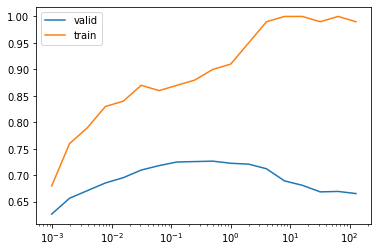

In [25]:
from matplotlib import pyplot as plt
plt.plot(Cs, results_valid, label="valid")
plt.plot(Cs, results_train, label="train")
plt.xscale("log")  # Notice the log-scale here since our C are logarithmically spaced !

plt.legend()

# Language modeling

Language modeling is a way to train models to generate text. 
We will see how to use Pytorch models to do language modeling.

First, let's look at a few steps that are necessary for text processing.

Code adapted from https://github.com/pytorch/examples/tree/master/word_language_model


## Tokenization

Tokenization creates a dictionary that contains all words, and creates an index for each word. 
Look at the class Dictionary and Corpus below. 
What do they do ?

**Answer:** Dictionary allows to go from strings to numerical ids and from numerical ids to strings. Remember that first, we associate each word with a unique id, then we map these ids to vectors.

Corpus represents a corpus of text by adding all the words to its ```Dictionary``` and then transforming the sentences from lists of words to lists of ids.

In [0]:
import os
from io import open
import torch

class Dictionary(object):
    def __init__(self):
        self.word2idx = {}
        self.idx2word = []

    def add_word(self, word):
        if word not in self.word2idx:
            self.idx2word.append(word)
            self.word2idx[word] = len(self.idx2word) - 1
        return self.word2idx[word]

    def __len__(self):
        return len(self.idx2word)


class Corpus(object):
    def __init__(self, path):
        self.dictionary = Dictionary()
        self.train = self.tokenize(os.path.join(path, 'train.txt'))
        self.valid = self.tokenize(os.path.join(path, 'valid.txt'))
        self.test = self.tokenize(os.path.join(path, 'test.txt'))

    def tokenize(self, path):
        """Tokenizes a text file."""
        print(path)
        assert os.path.exists(path)
        # Add words to the dictionary
        with open(path, 'r', encoding="utf8") as f:
            for line in f:
                words = line.split() + ['<eos>']
                for word in words:
                    self.dictionary.add_word(word)

        # Tokenize file content
        with open(path, 'r', encoding="utf8") as f:
            idss = []
            for line in f:
                words = line.split() + ['<eos>']
                ids = []
                for word in words:
                    ids.append(self.dictionary.word2idx[word])
                idss.append(torch.tensor(ids).type(torch.int64))
            ids = torch.cat(idss)

        return ids

## RNN and LSTM models

In [0]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F


class RNNModel(nn.Module):
    """Container module with an encoder, a recurrent module, and a decoder."""

    def __init__(self, rnn_type, num_token, embedding_dim, hidden_dim, num_layers, dropout=0.5):
        super(RNNModel, self).__init__()

        self.drop = nn.Dropout(dropout)
        self.encoder = nn.Embedding(num_token, embedding_dim)

        if rnn_type == 'LSTM':
            self.rnn = nn.LSTM(embedding_dim, hidden_dim, num_layers, dropout=dropout)
        elif rnn_type == 'RNN':
            self.rnn = nn.RNN(embedding_dim, hidden_dim, num_layers, dropout=dropout)
        else:
            raise NotImplementedError("""Only RNN and LSTM are implemented yet""")
            
        self.decoder = nn.Linear(hidden_dim, num_token)

        self.init_weights()

        self.rnn_type = rnn_type
        self.num_layers = num_layers
        self.hidden_dim = hidden_dim

    def init_weights(self):
        initrange = 0.1
        self.encoder.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self, input, hidden):
        emb = self.drop(self.encoder(input))

        output, hidden = self.rnn(emb, hidden)
        output = self.drop(output)
        decoded = self.decoder(output)

        return decoded, hidden

    def init_hidden(self, bsz):
        weight = next(self.parameters())
        if self.rnn_type == 'LSTM':
            return (weight.new_zeros(self.num_layers, bsz, self.hidden_dim),
                    weight.new_zeros(self.num_layers, bsz, self.hidden_dim))
        else:
            return weight.new_zeros(self.num_layers, bsz, self.hidden_dim)

## Train your own language model

In [28]:
!wget -O train.txt https://github.com/pytorch/examples/blob/master/word_language_model/data/wikitext-2/train.txt?raw=true
!wget -O valid.txt https://github.com/pytorch/examples/blob/master/word_language_model/data/wikitext-2/valid.txt?raw=true
!wget -O test.txt https://github.com/pytorch/examples/blob/master/word_language_model/data/wikitext-2/test.txt?raw=true

--2020-01-25 11:16:20--  https://github.com/pytorch/examples/blob/master/word_language_model/data/wikitext-2/train.txt?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pytorch/examples/raw/master/word_language_model/data/wikitext-2/train.txt [following]
--2020-01-25 11:16:20--  https://github.com/pytorch/examples/raw/master/word_language_model/data/wikitext-2/train.txt
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pytorch/examples/master/word_language_model/data/wikitext-2/train.txt [following]
--2020-01-25 11:16:20--  https://raw.githubusercontent.com/pytorch/examples/master/word_language_model/data/wikitext-2/train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ..

In [0]:
import argparse
import time
import math
import os
import torch
import torch.nn as nn
import torch.onnx

args = argparse.Namespace(
  data='.',
  model='LSTM',
  emsize=200,
  nhid=200,
  nlayers=2,
  lr=20,
  clip=0.25,
  epochs=20,
  batch_size=20,
  bptt=35,
  dropout=0.2,
  seed=1111,
  cuda=True,
  log_interval=200,
  save='model.pt'
)

torch.manual_seed(args.seed)

if args.cuda:
    device = "cuda:0"
else:
    device = "cpu"

In [30]:
###############################################################################
# Load data
###############################################################################

corpus = Corpus(args.data)

# Starting from sequential data, batchify arranges the dataset into columns.
# For instance, with the alphabet as the sequence and batch size 4, we'd get
# ┌ a g m s ┐
# │ b h n t │
# │ c i o u │
# │ d j p v │
# │ e k q w │
# └ f l r x ┘.
# These columns are treated as independent by the model, which means that the
# dependence of e. g. 'g' on 'f' can not be learned, but allows more efficient
# batch processing.

def batchify(data, bsz):
    # Work out how cleanly we can divide the dataset into bsz parts.
    nbatch = data.size(0) // bsz
    # Trim off any extra elements that wouldn't cleanly fit (remainders).
    data = data.narrow(0, 0, nbatch * bsz)
    # Evenly divide the data across the bsz batches.
    data = data.view(bsz, -1).t().contiguous()
    return data.to(device)

eval_batch_size = 10
train_data = batchify(corpus.train, args.batch_size)
val_data = batchify(corpus.valid, eval_batch_size)
test_data = batchify(corpus.test, eval_batch_size)

./train.txt
./valid.txt
./test.txt


Build the model

In [0]:
ntokens = len(corpus.dictionary)
model = RNNModel(args.model, ntokens, args.emsize, args.nhid, args.nlayers, args.dropout).to(device)
criterion = nn.CrossEntropyLoss()


Training code

In [0]:
def repackage_hidden(h):
    """Wraps hidden states in new Tensors, to detach them from their history."""

    if isinstance(h, torch.Tensor):
        # RNN
        return h.detach()
    else:
        # LSTM 
        return tuple(repackage_hidden(v) for v in h)


# get_batch subdivides the source data into chunks of length args.bptt.
# If source is equal to the example output of the batchify function, with
# a bptt-limit of 2, we'd get the following two Variables for i = 0:
# ┌ a g m s ┐ ┌ b h n t ┐
# └ b h n t ┘ └ c i o u ┘
# Note that despite the name of the function, the subdivison of data is not
# done along the batch dimension (i.e. dimension 1), since that was handled
# by the batchify function. The chunks are along dimension 0, corresponding
# to the seq_len dimension in the LSTM.

def get_batch(source, i):
    seq_len = min(args.bptt, len(source) - 1 - i)
    data = source[i:i+seq_len]
    target = source[i+1:i+1+seq_len].view(-1)
    return data, target


def evaluate(model, data_source):
    # Turn on evaluation mode which disables dropout.
    model.eval()
    total_loss = 0.
    ntokens = len(corpus.dictionary)
    hidden = model.init_hidden(eval_batch_size)
    
    with torch.no_grad():
        for i in range(0, data_source.size(0) - 1, args.bptt):
            data, targets = get_batch(data_source, i)
            output, hidden = model(data, hidden)
            hidden = repackage_hidden(hidden)
            output_flat = output.view(-1, ntokens)
            total_loss += len(data) * criterion(output_flat, targets).item()

    return total_loss / (len(data_source) - 1)


def train():
    # Turn on training mode which enables dropout.
    model.train()
    total_loss = 0.
    start_time = time.time()
    ntokens = len(corpus.dictionary)
    hidden = model.init_hidden(args.batch_size)

    for batch, i in enumerate(range(0, train_data.size(0) - 1, args.bptt)):
        data, targets = get_batch(train_data, i)
        # Starting each batch, we detach the hidden state from how it was previously produced.
        # If we didn't, the model would try backpropagating all the way to start of the dataset.
        model.zero_grad()
        hidden = repackage_hidden(hidden)
        output, hidden = model(data, hidden)
        loss = criterion(output.view(-1, ntokens), targets)
        loss.backward()

        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        torch.nn.utils.clip_grad_norm_(model.parameters(), args.clip)
        for p in model.parameters():
            p.data.add_(-lr, p.grad.data)

        total_loss += loss.item()

        if batch % args.log_interval == 0 and batch > 0:
            cur_loss = total_loss / args.log_interval
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches | lr {:02.2f} | ms/batch {:5.2f} | '
                    'loss {:5.2f} | ppl {:8.2f}'.format(
                epoch, batch, len(train_data) // args.bptt, lr,
                elapsed * 1000 / args.log_interval, cur_loss, math.exp(cur_loss)))
            total_loss = 0
            start_time = time.time()


### Training loop

Training for 20 epochs should take ~15 minutes.

In [33]:
# Loop over epochs.
lr = args.lr
best_val_loss = None

# At any point you can hit Ctrl + C to break out of training early.
try:
    for epoch in range(1, args.epochs+1):
        epoch_start_time = time.time()
        train()
        val_loss = evaluate(model, val_data)
        print('-' * 89)
        print('| end of epoch {:3d} | time: {:5.2f}s | valid loss {:5.2f} | '
                'valid ppl {:8.2f}'.format(epoch, (time.time() - epoch_start_time),
                                           val_loss, math.exp(val_loss)))
        print('-' * 89)
        # Save the model if the validation loss is the best we've seen so far.
        if not best_val_loss or val_loss < best_val_loss:
            with open(args.save, 'wb') as f:
                torch.save(model, f)
            best_val_loss = val_loss
        else:
            # Anneal the learning rate if no improvement has been seen in the validation dataset.
            lr /= 4.0
except KeyboardInterrupt:
    print('-' * 89)
    print('Exiting from training early')


| epoch   1 |   200/ 2983 batches | lr 20.00 | ms/batch 19.68 | loss  7.63 | ppl  2055.87
| epoch   1 |   400/ 2983 batches | lr 20.00 | ms/batch 19.12 | loss  6.85 | ppl   945.67
| epoch   1 |   600/ 2983 batches | lr 20.00 | ms/batch 18.98 | loss  6.47 | ppl   644.55
| epoch   1 |   800/ 2983 batches | lr 20.00 | ms/batch 19.06 | loss  6.28 | ppl   536.38
| epoch   1 |  1000/ 2983 batches | lr 20.00 | ms/batch 19.13 | loss  6.14 | ppl   463.47
| epoch   1 |  1200/ 2983 batches | lr 20.00 | ms/batch 19.38 | loss  6.05 | ppl   425.27
| epoch   1 |  1400/ 2983 batches | lr 20.00 | ms/batch 19.54 | loss  5.95 | ppl   382.23
| epoch   1 |  1600/ 2983 batches | lr 20.00 | ms/batch 19.34 | loss  5.94 | ppl   380.31
| epoch   1 |  1800/ 2983 batches | lr 20.00 | ms/batch 19.65 | loss  5.81 | ppl   334.16
| epoch   1 |  2000/ 2983 batches | lr 20.00 | ms/batch 19.72 | loss  5.78 | ppl   324.48
| epoch   1 |  2200/ 2983 batches | lr 20.00 | ms/batch 19.92 | loss  5.66 | ppl   287.93
| epoch   

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type RNNModel. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Dropout. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Embedding. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LSTM. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dis

| epoch   2 |   200/ 2983 batches | lr 20.00 | ms/batch 20.21 | loss  5.55 | ppl   256.31
| epoch   2 |   400/ 2983 batches | lr 20.00 | ms/batch 20.21 | loss  5.53 | ppl   252.68
| epoch   2 |   600/ 2983 batches | lr 20.00 | ms/batch 20.21 | loss  5.35 | ppl   211.12
| epoch   2 |   800/ 2983 batches | lr 20.00 | ms/batch 20.23 | loss  5.37 | ppl   215.02
| epoch   2 |  1000/ 2983 batches | lr 20.00 | ms/batch 20.21 | loss  5.35 | ppl   209.95
| epoch   2 |  1200/ 2983 batches | lr 20.00 | ms/batch 20.23 | loss  5.33 | ppl   207.23
| epoch   2 |  1400/ 2983 batches | lr 20.00 | ms/batch 20.19 | loss  5.33 | ppl   206.24
| epoch   2 |  1600/ 2983 batches | lr 20.00 | ms/batch 20.20 | loss  5.39 | ppl   219.16
| epoch   2 |  1800/ 2983 batches | lr 20.00 | ms/batch 20.21 | loss  5.27 | ppl   193.49
| epoch   2 |  2000/ 2983 batches | lr 20.00 | ms/batch 20.20 | loss  5.28 | ppl   195.51
| epoch   2 |  2200/ 2983 batches | lr 20.00 | ms/batch 20.20 | loss  5.18 | ppl   177.75
| epoch   

In [34]:
# Run on test data.
test_loss = evaluate(model, test_data)
print('=' * 89)
print('| End of training | test loss {:5.2f} | test ppl {:8.2f}'.format(
    test_loss, math.exp(test_loss)))
print('=' * 89)


| End of training | test loss  4.71 | test ppl   111.42


## Generate sentences with a trained language model

In [35]:
args.words = 200
args.temperature = 1

model.eval()

ntokens = len(corpus.dictionary)

hidden = model.init_hidden(1)
input = torch.randint(ntokens, (1, 1), dtype=torch.long).to(device)

text = []
with torch.no_grad():  # no tracking history
    for i in range(args.words):
        output, hidden = model(input, hidden)
        word_weights = output.squeeze().div(args.temperature).exp().cpu()
        word_idx = torch.multinomial(word_weights, 1)[0]
        input.fill_(word_idx)

        word = corpus.dictionary.idx2word[word_idx]
        text.append(word)

        if i % args.log_interval == 0:
            print('| Generated {}/{} words'.format(i, args.words))

print(" ".join(text))

| Generated 0/200 words
whose own wish to enter the bouquet of Reese . <eos> South of the organization comes ashore , : " In good history , many <unk> starts , one of the largest Northern readers in America series , this time , and the new . " Peter Tiny 's Andrew Wat was acting on 30 March 1890 . It was too late in the words that was ongoing early in the first half of 37 – 74 , due to his break as they were about ; he was given the work of a dislike for her child , whilst " The Ballad of British crime " is strange , but others include another of the fictional football LP by winning the way , possibly deals , and the following day . Now he made it great album he out of freshness . Ned critic Will <unk> wrote that the scene was inspired by his depiction of an alien , hard history of Wolf and melodic dynamics , the faithful , making the " <unk> " against the music system . <eos> The drum air readiness should be given originally of V Corps in the magazine and couple later the


## Demo of the best language models

https://transformer.huggingface.co/